In [1]:
import os.path
import glob
import datetime
import pandas as pd

In [2]:
os.path.abspath(".")

'D:\\PROJECTS\\xcj_project2'

## W

In [20]:
MIN_TWEETS = 10
FREQUENCY = '1D'

In [21]:
wdf = pd.concat([ pd.read_csv(f, skiprows=5, parse_dates=["Date"], usecols=["Author","Sentiment","Date","Url","Title"]) for f in glob.glob("./data/data_for_w/*.csv*")])
wdf.dropna(subset=["Author","Date","Sentiment"], inplace=True)
wdf.drop_duplicates("Url", inplace=True)
# wdf.drop(columns=["Url"], inplace=True)
wdf["Title"] = wdf["Title"].apply(lambda x: x.lower())
wdf 

,Date,Title,Url,Sentiment,Author
0,2023-07-10 03:59:38,rt @nikee1_ nike https://t.co/3zvdpwii3c,http://twitter.com/KevinS78500/statuses/167825...,neutral,KevinS78500
1,2023-07-10 03:57:34,jdsports ca restock: nike women's dunk low sai...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure
2,2023-07-10 03:56:35,nike us restock: nike dunk low lx women's shoe...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure
3,2023-07-10 03:55:34,rt @justfreshkicks nike kobe 6 protro “reverse...,http://twitter.com/onlyonejaevonn/statuses/167...,neutral,onlyonejaevonn
4,2023-07-10 03:55:02,"60% off the nike solo swoosh crewneck ""heather...",http://twitter.com/SneakerShouts/statuses/1678...,neutral,SneakerShouts
...,...,...,...,...,...
99397,2023-07-10 04:05:01,60% off the nike solo swoosh crewneck sweatshi...,http://twitter.com/SneakerShouts/statuses/1678...,neutral,SneakerShouts
99398,2023-07-10 04:04:54,rt @sneakerscouts #sneakerscouts the nike air ...,http://twitter.com/SneakerScouts/statuses/1678...,neutral,SneakerScouts
99399,2023-07-10 04:03:02,43einhalb restock: nike dunk low night maroon\...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure
99400,2023-07-10 04:02:53,jdsports ca restock: nike dunk low retro se se...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure


In [22]:
wdf["Author"].nunique()

524

In [23]:
wdf["Date"].min(), wdf["Date"].max(), wdf["Date"].max() - wdf["Date"].min()

(Timestamp('2023-06-01 04:00:01'),
 Timestamp('2023-08-20 03:59:37'),
 Timedelta('79 days 23:59:36'))

In [24]:
wdf["mcdonalds"] = wdf["Title"].apply(lambda x: "mcdonald" in x)
wdf["starbucks"] = wdf["Title"].apply(lambda x: "starbuck" in x)
wdf["nike"] = wdf["Title"].apply(lambda x: "nike" in x)
wdf

,Date,Title,Url,Sentiment,Author,mcdonalds,starbucks,nike
0,2023-07-10 03:59:38,rt @nikee1_ nike https://t.co/3zvdpwii3c,http://twitter.com/KevinS78500/statuses/167825...,neutral,KevinS78500,False,False,True
1,2023-07-10 03:57:34,jdsports ca restock: nike women's dunk low sai...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure,False,False,True
2,2023-07-10 03:56:35,nike us restock: nike dunk low lx women's shoe...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure,False,False,True
3,2023-07-10 03:55:34,rt @justfreshkicks nike kobe 6 protro “reverse...,http://twitter.com/onlyonejaevonn/statuses/167...,neutral,onlyonejaevonn,False,False,True
4,2023-07-10 03:55:02,"60% off the nike solo swoosh crewneck ""heather...",http://twitter.com/SneakerShouts/statuses/1678...,neutral,SneakerShouts,False,False,True
...,...,...,...,...,...,...,...,...
99397,2023-07-10 04:05:01,60% off the nike solo swoosh crewneck sweatshi...,http://twitter.com/SneakerShouts/statuses/1678...,neutral,SneakerShouts,False,False,True
99398,2023-07-10 04:04:54,rt @sneakerscouts #sneakerscouts the nike air ...,http://twitter.com/SneakerScouts/statuses/1678...,neutral,SneakerScouts,False,False,True
99399,2023-07-10 04:03:02,43einhalb restock: nike dunk low night maroon\...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure,False,False,True
99400,2023-07-10 04:02:53,jdsports ca restock: nike dunk low retro se se...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure,False,False,True


In [25]:
wdf.drop(wdf[~wdf["mcdonalds"] & ~wdf["starbucks"] & ~wdf["nike"]].index, inplace=True)
wdf

,Date,Title,Url,Sentiment,Author,mcdonalds,starbucks,nike
0,2023-07-10 03:59:38,rt @nikee1_ nike https://t.co/3zvdpwii3c,http://twitter.com/KevinS78500/statuses/167825...,neutral,KevinS78500,False,False,True
1,2023-07-10 03:57:34,jdsports ca restock: nike women's dunk low sai...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure,False,False,True
2,2023-07-10 03:56:35,nike us restock: nike dunk low lx women's shoe...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure,False,False,True
3,2023-07-10 03:55:34,rt @justfreshkicks nike kobe 6 protro “reverse...,http://twitter.com/onlyonejaevonn/statuses/167...,neutral,onlyonejaevonn,False,False,True
4,2023-07-10 03:55:02,"60% off the nike solo swoosh crewneck ""heather...",http://twitter.com/SneakerShouts/statuses/1678...,neutral,SneakerShouts,False,False,True
...,...,...,...,...,...,...,...,...
99397,2023-07-10 04:05:01,60% off the nike solo swoosh crewneck sweatshi...,http://twitter.com/SneakerShouts/statuses/1678...,neutral,SneakerShouts,False,False,True
99398,2023-07-10 04:04:54,rt @sneakerscouts #sneakerscouts the nike air ...,http://twitter.com/SneakerScouts/statuses/1678...,neutral,SneakerScouts,False,False,True
99399,2023-07-10 04:03:02,43einhalb restock: nike dunk low night maroon\...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure,False,False,True
99400,2023-07-10 04:02:53,jdsports ca restock: nike dunk low retro se se...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure,False,False,True


In [26]:
author_mcd = wdf[["Author", "mcdonalds"]].groupby("Author").apply(lambda gwdf: gwdf["mcdonalds"].sum()).rename("mcdonalds_count").reset_index()
author_stb = wdf[["Author", "starbucks"]].groupby("Author").apply(lambda gwdf: gwdf["starbucks"].sum()).rename("starbucks_count").reset_index()
author_nke = wdf[["Author", "nike"]].groupby("Author").apply(lambda gwdf: gwdf["nike"].sum()).rename("nike_count").reset_index()

In [27]:
author_brand = author_mcd.merge(author_stb, how="outer", on="Author", validate="one_to_one").merge(author_nke, how="outer", on="Author", validate="one_to_one").set_index("Author")
author_brand["counts_sum"] = author_brand.sum(axis=1)
author_brand["max_type"] = author_brand[["mcdonalds_count","starbucks_count","nike_count"]].idxmax(axis=1).apply(lambda x: x[:-6])
# author_brand["mcdonalds_count"] /= author_brand["counts_sum"]
# author_brand["starbucks_count"] /= author_brand["counts_sum"]
# author_brand["nike_count"] /= author_brand["counts_sum"]
author_brand = author_brand[author_brand["counts_sum"] > MIN_TWEETS]
author_brand

,mcdonalds_count,starbucks_count,nike_count,counts_sum,max_type
Author,,,,,
0d7aw,0,0,16,16,nike
100Ebay,0,1,213,214,nike
1560gl,0,73,0,73,starbucks
19Edwin2,0,0,83,83,nike
1Mauricewood,3,3,193,199,nike
...,...,...,...,...,...
xalilulah,0,0,69,69,nike
xx_somm,0,0,93,93,nike
y0_stephhh,0,1,146,147,nike


In [28]:
author_brand[(author_brand["nike_count"] != 0) & (author_brand["starbucks_count"] == author_brand["nike_count"])]

,mcdonalds_count,starbucks_count,nike_count,counts_sum,max_type
Author,,,,,
jl_kpop,0,8,8,16,starbucks
nypost,46,14,14,74,mcdonalds


In [29]:
author_brand[(author_brand["mcdonalds_count"] != 0) & (author_brand["nike_count"] == author_brand["mcdonalds_count"])]

,mcdonalds_count,starbucks_count,nike_count,counts_sum,max_type
Author,,,,,
FoxNews,10,3,10,23,mcdonalds
LondonBel0w5,1,227,1,229,starbucks


In [30]:
author_brand[(author_brand["mcdonalds_count"] != 0) & (author_brand["starbucks_count"] == author_brand["mcdonalds_count"])]

,mcdonalds_count,starbucks_count,nike_count,counts_sum,max_type
Author,,,,,
1Mauricewood,3,3,193,199,nike
CarlBancoro,1,1,42,44,nike
DANNYFURLONGDJ,1,1,166,168,nike
Dat_Boi_Ken,2,2,31,35,nike
KwakuJunio61680,3,3,100,106,nike
Michaeldoge420,1,1,1100,1102,nike
ScottyDeals,1,1,696,698,nike
TYNASTY89,1,1,377,379,nike
ThePettiestLA,1,1,47,49,nike


In [31]:
wdf[~wdf["mcdonalds"] & ~wdf["starbucks"] & ~wdf["nike"]]

,Date,Title,Url,Sentiment,Author,mcdonalds,starbucks,nike


In [32]:
author_to_brand = author_brand['max_type'].to_dict()

In [33]:
# drop tweets by all other users
wdf.drop(wdf[~wdf["Author"].isin(author_to_brand)].index, inplace=True)

In [34]:
wdf["AuthorBrand"] = wdf["Author"].apply(lambda x: author_to_brand[x])
wdf

,Date,Title,Url,Sentiment,Author,mcdonalds,starbucks,nike,AuthorBrand
0,2023-07-10 03:59:38,rt @nikee1_ nike https://t.co/3zvdpwii3c,http://twitter.com/KevinS78500/statuses/167825...,neutral,KevinS78500,False,False,True,nike
1,2023-07-10 03:57:34,jdsports ca restock: nike women's dunk low sai...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure,False,False,True,nike
2,2023-07-10 03:56:35,nike us restock: nike dunk low lx women's shoe...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure,False,False,True,nike
3,2023-07-10 03:55:34,rt @justfreshkicks nike kobe 6 protro “reverse...,http://twitter.com/onlyonejaevonn/statuses/167...,neutral,onlyonejaevonn,False,False,True,nike
4,2023-07-10 03:55:02,"60% off the nike solo swoosh crewneck ""heather...",http://twitter.com/SneakerShouts/statuses/1678...,neutral,SneakerShouts,False,False,True,nike
...,...,...,...,...,...,...,...,...,...
99397,2023-07-10 04:05:01,60% off the nike solo swoosh crewneck sweatshi...,http://twitter.com/SneakerShouts/statuses/1678...,neutral,SneakerShouts,False,False,True,nike
99398,2023-07-10 04:04:54,rt @sneakerscouts #sneakerscouts the nike air ...,http://twitter.com/SneakerScouts/statuses/1678...,neutral,SneakerScouts,False,False,True,nike
99399,2023-07-10 04:03:02,43einhalb restock: nike dunk low night maroon\...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure,False,False,True,nike
99400,2023-07-10 04:02:53,jdsports ca restock: nike dunk low retro se se...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure,False,False,True,nike


In [35]:
# remove tweets in which Authors talk about other brands than the one they mostly talk about
wdf.drop(wdf[wdf[['mcdonalds', 'starbucks','nike', 'AuthorBrand']].apply(lambda row: not row[row["AuthorBrand"]], axis=1)].index, inplace=True)

In [36]:
sentiment_to_number = {"none": 1, "positive": 2, "neutral": 3, "negative": 4}
wdf["SentimentNo"] = wdf["Sentiment"].apply(lambda x: sentiment_to_number[x])
wdf

,Date,Title,Url,Sentiment,Author,mcdonalds,starbucks,nike,AuthorBrand,SentimentNo
0,2023-07-10 03:59:38,rt @nikee1_ nike https://t.co/3zvdpwii3c,http://twitter.com/KevinS78500/statuses/167825...,neutral,KevinS78500,False,False,True,nike,3
1,2023-07-10 03:57:34,jdsports ca restock: nike women's dunk low sai...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure,False,False,True,nike,3
2,2023-07-10 03:56:35,nike us restock: nike dunk low lx women's shoe...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure,False,False,True,nike,3
3,2023-07-10 03:55:34,rt @justfreshkicks nike kobe 6 protro “reverse...,http://twitter.com/onlyonejaevonn/statuses/167...,neutral,onlyonejaevonn,False,False,True,nike,3
4,2023-07-10 03:55:02,"60% off the nike solo swoosh crewneck ""heather...",http://twitter.com/SneakerShouts/statuses/1678...,neutral,SneakerShouts,False,False,True,nike,3
...,...,...,...,...,...,...,...,...,...,...
99397,2023-07-10 04:05:01,60% off the nike solo swoosh crewneck sweatshi...,http://twitter.com/SneakerShouts/statuses/1678...,neutral,SneakerShouts,False,False,True,nike,3
99398,2023-07-10 04:04:54,rt @sneakerscouts #sneakerscouts the nike air ...,http://twitter.com/SneakerScouts/statuses/1678...,neutral,SneakerScouts,False,False,True,nike,3
99399,2023-07-10 04:03:02,43einhalb restock: nike dunk low night maroon\...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure,False,False,True,nike,3
99400,2023-07-10 04:02:53,jdsports ca restock: nike dunk low retro se se...,http://twitter.com/Sneaks4sure/statuses/167825...,neutral,Sneaks4sure,False,False,True,nike,3


In [37]:
def get_avg_sentiment(df):
    # print(df.head(), df["SentimentNo"].mode().sort_values().iloc[0])
    return df["SentimentNo"].mode().sort_values().iloc[0]
    
pvt = wdf[["Date", "Author", "SentimentNo"]].set_index("Date").groupby([pd.Grouper(freq=FREQUENCY), 'Author']).apply(lambda tdf: get_avg_sentiment(tdf)).rename("ModeSentiment").reset_index()
pvt

,Date,Author,ModeSentiment
0,2023-06-01,0d7aw,2
1,2023-06-01,100Ebay,3
2,2023-06-01,1560gl,3
3,2023-06-01,19Edwin2,3
4,2023-06-01,1Mauricewood,3
...,...,...,...
21570,2023-08-20,nachodelaheysus,3
21571,2023-08-20,queen_j1,2
21572,2023-08-20,swooshsupply,3
21573,2023-08-20,tinochchan,2


In [39]:
output_wdf = pvt.pivot(index="Author", columns="Date", values="ModeSentiment").fillna(1)
output_wdf.to_csv("W_data_f{}_mt{}.csv".format(FREQUENCY, MIN_TWEETS))
output_wdf

Date,2023-06-01,2023-06-02,2023-06-03,2023-06-04,2023-06-05,2023-06-06,2023-06-07,2023-06-08,2023-06-09,2023-06-10,...,2023-08-11,2023-08-12,2023-08-13,2023-08-14,2023-08-15,2023-08-16,2023-08-17,2023-08-18,2023-08-19,2023-08-20
Author,,,,,,,,,,,,,,,,,,,,,
0d7aw,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
100Ebay,3.0,1.0,3.0,3.0,1.0,3.0,1.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0
1560gl,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,...,3.0,3.0,3.0,1.0,3.0,1.0,3.0,1.0,3.0,1.0
19Edwin2,3.0,3.0,3.0,1.0,1.0,3.0,3.0,3.0,1.0,3.0,...,3.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0
1Mauricewood,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xalilulah,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
xx_somm,3.0,3.0,3.0,1.0,3.0,3.0,1.0,2.0,3.0,1.0,...,3.0,1.0,1.0,3.0,1.0,1.0,3.0,3.0,3.0,1.0
y0_stephhh,3.0,3.0,2.0,3.0,1.0,3.0,2.0,1.0,3.0,3.0,...,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Y

In [42]:
before_event_datetime = datetime.datetime(2023, 10, 8, 4)
print(before_event_datetime)
before_start = before_event_datetime - datetime.timedelta(days=14)
print(before_start)
after_end = before_event_datetime + datetime.timedelta(days=14)
print(after_end)

2023-10-08 04:00:00
2023-09-24 04:00:00
2023-10-22 04:00:00


In [47]:
ydf = pd.concat([ pd.read_csv(f, skiprows=5, parse_dates=["Date"], usecols=["Author","Sentiment","Date","Url","Title"]) for f in glob.glob("./data/data_for_y/*.csv*")]).sort_values("Date")
ydf.dropna(subset=["Author","Date","Sentiment"], inplace=True)
ydf.drop_duplicates("Url", inplace=True)
# ydf.drop(columns=["Url"], inplace=True)
ydf["Title"] = ydf["Title"].apply(lambda x: x.lower())
ydf 

,Date,Title,Url,Sentiment,Author
98506,2023-09-24 04:00:00,ad: nike air force 1 '07 lv8 'enamel green' fo...,http://twitter.com/SneakerDropWW/statuses/1705...,neutral,SneakerDropWW
98505,2023-09-24 04:01:02,"i staying outside starbucks 8:49 pm until now,...",http://twitter.com/lucy_naomi27/statuses/17057...,negative,lucy_naomi27
98504,2023-09-24 04:04:57,nike af1 x terror squad https://t.co/8i4vglfts...,http://twitter.com/bak2nyc/statuses/1705795430...,neutral,bak2nyc
98503,2023-09-24 04:05:11,nike air force 1 se 'baroque brown' \n\navaila...,http://twitter.com/SneakerScouts/statuses/1705...,neutral,SneakerScouts
98502,2023-09-24 04:08:41,ran 3.22 kilometres with nike⁠ run club \nday3...,http://twitter.com/harminderharry/statuses/170...,neutral,harminderharry
...,...,...,...,...,...
4,2023-10-28 03:56:54,nike air force 1 high vlone black university g...,http://twitter.com/mountainshirt/statuses/1718...,neutral,mountainshirt
3,2023-10-28 03:57:00,"against his wishes, fiona, her mother, and her...",http://twitter.com/EarthDesires/statuses/17181...,negative,EarthDesires
2,2023-10-28 03:57:02,nike air foamposite one tianjin\n💰 buy now : h...,http://twitter.com/mountainshirt/statuses/1718...,neutral,mountainshirt
1,2023-10-28 03:57:29,rt @justfreshkicks official look at a new nike...,http://twitter.com/sunatlaserbeam/statuses/171...,neutral,sunatlaserbeam


In [49]:
# use the same users as W
ydf.drop(ydf[~ydf["Author"].isin(author_to_brand)].index, inplace=True)
ydf.shape

(73295, 5)

In [50]:
bef_ydf = ydf[(before_start <= ydf["Date"]) & (ydf["Date"] > before_event_datetime)]
bef_ydf

,Date,Title,Url,Sentiment,Author
62650,2023-10-08 04:00:01,ad: nike sale event🚨\n\nextra 20% off select s...,http://twitter.com/SOLELINKS/statuses/17108676...,neutral,SOLELINKS
62652,2023-10-08 04:00:01,🛍️ ultimate sale on #nike us\n📉 up to 60% off ...,http://twitter.com/swooshsupply/statuses/17108...,neutral,swooshsupply
62651,2023-10-08 04:00:01,ad: extra 20% off thousands of styles during n...,http://twitter.com/SneakerDropWW/statuses/1710...,neutral,SneakerDropWW
62649,2023-10-08 04:00:09,@nike the lawsuit against nike and jordan br...,http://twitter.com/basil067/statuses/171086765...,neutral,basil067
62648,2023-10-08 04:00:45,nike us: 20% off select styles with code ultim...,http://twitter.com/BallinSneaks/statuses/17108...,neutral,BallinSneaks
...,...,...,...,...,...
15,2023-10-28 03:55:48,@kupcakeprose (note: i would technically not a...,http://twitter.com/AceOnFire77/statuses/171811...,neutral,AceOnFire77
9,2023-10-28 03:56:36,rt @thereal_jmillz_ what it do friends & fam! ...,http://twitter.com/Dan_in_SD/statuses/17181145...,neutral,Dan_in_SD
7,2023-10-28 03:56:37,@abuamiraah @nike i see you playa,http://twitter.com/iceberg562/statuses/1718114...,neutral,iceberg562
3,2023-10-28 03:57:00,"against his wishes, fiona, her mother, and her...",http://twitter.com/EarthDesires/statuses/17181...,negative,EarthDesires


In [51]:
aft_ydf = ydf[(before_event_datetime <= ydf["Date"]) & (ydf["Date"] < after_end)]
aft_ydf

,Date,Title,Url,Sentiment,Author
62653,2023-10-08 04:00:00,the mcrib is making its triumphant return near...,http://twitter.com/CBSNews/statuses/1710867616...,neutral,CBSNews
62650,2023-10-08 04:00:01,ad: nike sale event🚨\n\nextra 20% off select s...,http://twitter.com/SOLELINKS/statuses/17108676...,neutral,SOLELINKS
62652,2023-10-08 04:00:01,🛍️ ultimate sale on #nike us\n📉 up to 60% off ...,http://twitter.com/swooshsupply/statuses/17108...,neutral,swooshsupply
62651,2023-10-08 04:00:01,ad: extra 20% off thousands of styles during n...,http://twitter.com/SneakerDropWW/statuses/1710...,neutral,SneakerDropWW
62649,2023-10-08 04:00:09,@nike the lawsuit against nike and jordan br...,http://twitter.com/basil067/statuses/171086765...,neutral,basil067
...,...,...,...,...,...
18775,2023-10-22 03:40:10,nike cosmic unity 3 'midnight navy' \n\navaila...,http://twitter.com/SneakerScouts/statuses/1715...,neutral,SneakerScouts
18772,2023-10-22 03:41:38,nike ja 1 “backyard bbq” coming later this yea...,http://twitter.com/JaunNews/statuses/171593642...,neutral,JaunNews
18771,2023-10-22 03:42:36,rt @kicksdeals ⛳️ you can save $85 on the whit...,http://twitter.com/eaalva23/statuses/171593666...,neutral,eaalva23
18770,2023-10-22 03:45:03,"against his wishes, fiona, her mother, and her...",http://twitter.com/EarthDesires/statuses/17159...,negative,EarthDesires


In [66]:
author_before = bef_ydf[["Author", "Sentiment"]].groupby("Author").value_counts().rename("SentimentCount").reset_index().pivot(index="Author", columns="Sentiment", values="SentimentCount").fillna(0)
author_before

Sentiment,negative,neutral,positive
Author,,,
0d7aw,0.0,60.0,6.0
100Ebay,0.0,102.0,0.0
1560gl,0.0,39.0,0.0
19Edwin2,0.0,28.0,0.0
1Mauricewood,0.0,58.0,0.0
...,...,...,...
xXcvchikXx,10.0,144.0,80.0
xalilulah,0.0,24.0,0.0
xx_somm,0.0,34.0,1.0


In [67]:
author_after = aft_ydf[["Author", "Sentiment"]].groupby("Author").value_counts().rename("SentimentCount").reset_index().pivot(index="Author", columns="Sentiment", values="SentimentCount").fillna(0)
author_after

Sentiment,negative,neutral,positive
Author,,,
0d7aw,0.0,58.0,5.0
100Ebay,0.0,70.0,0.0
1560gl,0.0,27.0,0.0
19Edwin2,0.0,25.0,0.0
1Mauricewood,0.0,8.0,0.0
...,...,...,...
xXcvchikXx,8.0,108.0,56.0
xalilulah,0.0,15.0,0.0
xx_somm,0.0,29.0,1.0


In [70]:
author_before_after = author_before.join(author_after, how="outer", lsuffix="_before", rsuffix="_after")
author_before_after

Sentiment,negative_before,neutral_before,positive_before,negative_after,neutral_after,positive_after
Author,,,,,,
0d7aw,0.0,60.0,6.0,0.0,58.0,5.0
100Ebay,0.0,102.0,0.0,0.0,70.0,0.0
1560gl,0.0,39.0,0.0,0.0,27.0,0.0
19Edwin2,0.0,28.0,0.0,0.0,25.0,0.0
1Mauricewood,0.0,58.0,0.0,0.0,8.0,0.0
...,...,...,...,...,...,...
xXcvchikXx,10.0,144.0,80.0,8.0,108.0,56.0
xalilulah,0.0,24.0,0.0,0.0,15.0,0.0
xx_somm,0.0,34.0,1.0,0.0,29.0,1.0


In [73]:
author_before_after["diff_before"] = author_before_after["positive_before"] - author_before_after["negative_before"]
author_before_after["diff_after"] = author_before_after["positive_after"] - author_before_after["negative_after"]
author_before_after

Sentiment,negative_before,neutral_before,positive_before,negative_after,neutral_after,positive_after,diff_before,diff_after
Author,,,,,,,,
0d7aw,0.0,60.0,6.0,0.0,58.0,5.0,6.0,5.0
100Ebay,0.0,102.0,0.0,0.0,70.0,0.0,0.0,0.0
1560gl,0.0,39.0,0.0,0.0,27.0,0.0,0.0,0.0
19Edwin2,0.0,28.0,0.0,0.0,25.0,0.0,0.0,0.0
1Mauricewood,0.0,58.0,0.0,0.0,8.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
xXcvchikXx,10.0,144.0,80.0,8.0,108.0,56.0,70.0,48.0
xalilulah,0.0,24.0,0.0,0.0,15.0,0.0,0.0,0.0
xx_somm,0.0,34.0,1.0,0.0,29.0,1.0,1.0,1.0


In [109]:
author_before_after["Y"] = author_before_after[["diff_before", "diff_after"]].apply(lambda row: 1 if abs(row["diff_after"] - row["diff_before"]) > 1 else 0, axis=1)
author_before_after

Sentiment,negative_before,neutral_before,positive_before,negative_after,neutral_after,positive_after,diff_before,diff_after,Y
Author,,,,,,,,,
0d7aw,0.0,60.0,6.0,0.0,58.0,5.0,6.0,5.0,0
100Ebay,0.0,102.0,0.0,0.0,70.0,0.0,0.0,0.0,0
1560gl,0.0,39.0,0.0,0.0,27.0,0.0,0.0,0.0,0
19Edwin2,0.0,28.0,0.0,0.0,25.0,0.0,0.0,0.0,0
1Mauricewood,0.0,58.0,0.0,0.0,8.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
xXcvchikXx,10.0,144.0,80.0,8.0,108.0,56.0,70.0,48.0,1
xalilulah,0.0,24.0,0.0,0.0,15.0,0.0,0.0,0.0,0
xx_somm,0.0,34.0,1.0,0.0,29.0,1.0,1.0,1.0,0


In [110]:
author_before_after["Y"].value_counts()

0    322
1     88
Name: Y, dtype: int64

In [111]:
author_before_after["Y"].value_counts() / author_before_after.shape[0]

0    0.785366
1    0.214634
Name: Y, dtype: float64

In [113]:
author_before_after.to_csv("Y_data.csv")

In [94]:
(author_before_after["diff_after"] - author_before_after["diff_before"]).value_counts().sort_index()

-51.0       1
-43.0       1
-40.0       1
-37.0       1
-35.0       1
-30.0       1
-24.0       1
-23.0       1
-22.0       1
-20.0       1
-19.0       2
-18.0       1
-16.0       3
-15.0       2
-14.0       1
-13.0       1
-12.0       2
-11.0       2
-10.0       1
-9.0        1
-8.0        1
-7.0        3
-6.0        3
-5.0        1
-4.0        3
-3.0        9
-2.0       17
-1.0       57
 0.0      243
 1.0       22
 2.0       10
 3.0        5
 5.0        2
 6.0        2
 7.0        2
 14.0       1
 17.0       1
 23.0       1
 236.0      1
dtype: int64

In [89]:
author_before_after["Y"].value_counts()

0    243
1    167
Name: Y, dtype: int64

In [90]:
author_before_after["Y"].value_counts() / author_before_after.shape[0]

0    0.592683
1    0.407317
Name: Y, dtype: float64

In [21]:
# ydf[ydf["Author"] == "yenimeilani76"].iloc[-2].to_dict()

In [22]:
# Drop all tweets by users: "FENRIR___13", "yenimeilani76"
# ydf.drop(ydf[ydf["Author"].isin({"FENRIR___13", "yenimeilani76"})].index, inplace=True)

In [120]:
author_before_after["author_brand"] = author_before_after[["Y"]].apply(lambda x: author_to_brand[x.name], axis=1)
author_before_after

Sentiment,negative_before,neutral_before,positive_before,negative_after,neutral_after,positive_after,diff_before,diff_after,Y,author_brand
Author,,,,,,,,,,
0d7aw,0.0,60.0,6.0,0.0,58.0,5.0,6.0,5.0,0,nike
100Ebay,0.0,102.0,0.0,0.0,70.0,0.0,0.0,0.0,0,nike
1560gl,0.0,39.0,0.0,0.0,27.0,0.0,0.0,0.0,0,starbucks
19Edwin2,0.0,28.0,0.0,0.0,25.0,0.0,0.0,0.0,0,nike
1Mauricewood,0.0,58.0,0.0,0.0,8.0,0.0,0.0,0.0,0,nike
...,...,...,...,...,...,...,...,...,...,...
xXcvchikXx,10.0,144.0,80.0,8.0,108.0,56.0,70.0,48.0,1,nike
xalilulah,0.0,24.0,0.0,0.0,15.0,0.0,0.0,0.0,0,nike
xx_somm,0.0,34.0,1.0,0.0,29.0,1.0,1.0,1.0,0,nike


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
author_brand.max_type.value_counts()

nike         423
starbucks     33
mcdonalds     16
Name: max_type, dtype: int64

In [45]:
author_brand.max_type.value_counts() / author_brand.shape[0]

nike         0.896186
starbucks    0.069915
mcdonalds    0.033898
Name: max_type, dtype: float64

In [46]:
author_brand.shape

(472, 5)

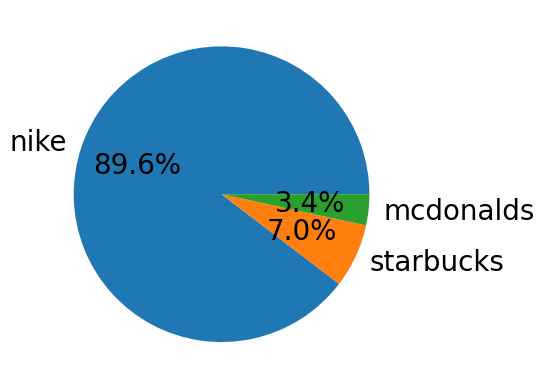

In [58]:
author_brand.max_type.value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':20})
plt.ylabel(None)
plt.show()